In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn import neighbors

In [46]:
#candle_product = pd.read_csv(r"C:\Users\Lenovo\Desktop\bingo\database\candles.csv")

In [47]:
#candle_product.head(10)

In [48]:
#candle_product.shape

In [49]:
product_rating = pd.read_csv(r"C:\Users\Lenovo\Desktop\bingo\database\ratings_Beauty_2.csv")

In [50]:
product_rating.head(10)

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,205616461,5,1369699200
1,A3JM6GV9MNOF9X,558925278,3,1355443200
2,A1Z513UWSAAO0F,558925278,5,1404691200
3,A1WMRR494NWEWV,733001998,4,1382572800
4,A3IAAVS479H7M7,737104473,1,1274227200
5,AKJHHD5VEH7VG,762451459,5,1404518400
6,A1BG8QW55XHN6U,1304139212,5,1371945600
7,A22VW0P4VZHDE3,1304139220,5,1373068800
8,A3V3RE4132GKRO,130414089X,5,1401840000
9,A327B0I7CYTEJC,130414643X,4,1389052800


In [51]:
popular_products = pd.DataFrame(product_rating.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B00006IV2F,704
B0000632EN,686
B00005O0MZ,585
B0000530ED,584
B00004TUBL,558
B0000AFUTL,558
B0000536P4,442
B00005A9WP,430
B000052YM7,412


<AxesSubplot:xlabel='ProductId'>

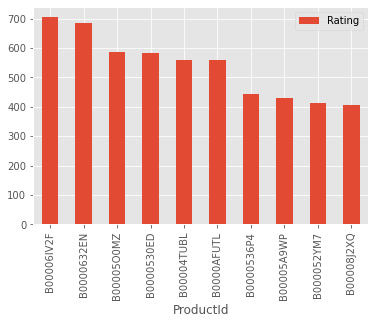

In [52]:
most_popular.head(10).plot(kind = "bar")

In [53]:
#popular_products = pd.DataFrame(product_rating.groupby('Product id')['rating'].count())

In [54]:
#popular_products.head()

In [55]:
#most_popular = popular_products.sort_values(by=['rating'])

In [56]:
#most_popular.head()

In [57]:
final_dataset = product_rating.pivot(index='ProductId',columns='UserId',values='Rating')

In [58]:
final_dataset.head()


UserId,A00205921JHJK5X9LNP42,A00473363TJ8YSZ3YAGG9,A01437583CZ7V02UKZQ5S,A01907982I6OHXDYN5HD6,A020135981U0UNEAE4JV,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A03454732N8VEYJAMGTTH,A03666331WS5WUZMM0AUD,...,AZZDA9BRMPP1B,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZSAMMJPJKJ1,AZZTJQ7CQZUD8,AZZVCBG5G4EV8,AZZWPNME0GQZ2
ProductId,,,,,,,,,,,,,,,,,,,,,
1304139212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1304139220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130414089X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130414643X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1304146537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
final_dataset.fillna(0,inplace=True)

In [60]:
final_dataset.head()

UserId,A00205921JHJK5X9LNP42,A00473363TJ8YSZ3YAGG9,A01437583CZ7V02UKZQ5S,A01907982I6OHXDYN5HD6,A020135981U0UNEAE4JV,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A03454732N8VEYJAMGTTH,A03666331WS5WUZMM0AUD,...,AZZDA9BRMPP1B,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZSAMMJPJKJ1,AZZTJQ7CQZUD8,AZZVCBG5G4EV8,AZZWPNME0GQZ2
ProductId,,,,,,,,,,,,,,,,,,,,,
1304139212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1304139220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130414089X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130414643X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1304146537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
no_user_voted = product_rating.groupby('ProductId')['Rating'].agg('count')

In [62]:
#no_movies_voted = product_rating.groupby('userid')['rating'].agg('count')

In [63]:
#f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
#plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
#plt.axhline(y=10,color='r')
#plt.xlabel('product id')
#plt.ylabel('No. of users rated')
#plt.show()

In [64]:
#removing sparsity 

from scipy.sparse import csr_matrix

csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [65]:
final_dataset.reset_index(inplace=True)

In [66]:
#making the recommendattion model


knn = neighbors.KNeighborsClassifier(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

TypeError: fit() missing 1 required positional argument: 'y'

In [ ]:
product_ratings1 = product_rating.head(10000)

In [ ]:
ratings_utility_matrix = product_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ratings_utility_matrix.shape

(9697, 886)

In [ ]:
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X1 = X

In [ ]:
#decomposing the matrix

SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

In [ ]:
# correlation matrix

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

In [ ]:
#isolating a product id

X.index[99]

'6117036094'

In [ ]:
i = "6117036094"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

In [ ]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

In [ ]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

['9790794010', 'B000052YOQ']